In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load obstacle data

data = np.genfromtxt('/home/oscar_palfelt/MSc_thesis/LearnedSamplingDistributions/narrowDataFile.txt', delimiter=',', usecols=range(27))
numEntries = data.shape[0]
obsData = data[:, 6:-13]

In [3]:
# Generate occupancy grid
def isSampleFree(sample, obs):
    for o in list(range(0,obs.shape[0]//(2*dimW))): # python 2 -> 3: use list(), use //
        isFree = 0
        for d in range(0,sample.shape[0]):
            if (sample[d] < obs[2*dimW*o + d] or sample[d] > obs[2*dimW*o + d + dimW]):
                isFree = 1
                break
        if isFree == 0:
            return 0
    return 1

gridSize = 11

# process data into occupancy grid
occGrids = np.zeros([numEntries,gridSize*gridSize])
occGridSamples = np.zeros([gridSize*gridSize, 2])
gridPointsRange = np.linspace(0,1,num=gridSize)

idx = 0;
for i in gridPointsRange:
    for j in gridPointsRange:
        occGridSamples[idx,0] = i
        occGridSamples[idx,1] = j
        idx += 1;

for j in range(0,numEntries,1):
    dw = 0.1
    dimW = 3
    gap1 = obsData[j,0:3]
    gap2 = obsData[j,3:6]
    gap3 = obsData[j,6:9]

    obs1 = [0, gap1[1]-dw, -0.5,          gap1[0], gap1[1], 1.5]
    obs2 = [gap2[0]-dw, 0, -0.5,          gap2[0], gap2[1], 1.5]
    obs3 = [gap2[0]-dw, gap2[1]+dw, -0.5, gap2[0], 1, 1.5]
    obs4 = [gap1[0]+dw, gap1[1]-dw, -0.5, gap3[0], gap1[1], 1.5]
    obs5 = [gap3[0]+dw, gap1[1]-dw, -0.5, 1, gap1[1], 1.5]
    obs = np.concatenate((obs1, obs2, obs3, obs4, obs5), axis=0)
    
    if j % 5000 == 0:
        print('Iter: {}'.format(j))
        
    occGrid = np.zeros(gridSize*gridSize)
    for i in range(0,gridSize*gridSize):
        occGrid[i] = isSampleFree(occGridSamples[i,:],obs)
    occGrids[j,:] = occGrid

Iter: 0
Iter: 5000
Iter: 10000
Iter: 15000
Iter: 20000
Iter: 25000
Iter: 30000
Iter: 35000
Iter: 40000
Iter: 45000
Iter: 50000
Iter: 55000
Iter: 60000
Iter: 65000
Iter: 70000
Iter: 75000
Iter: 80000


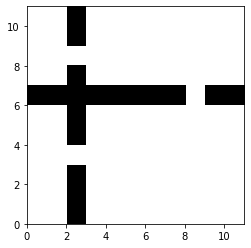

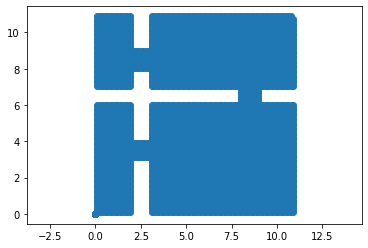

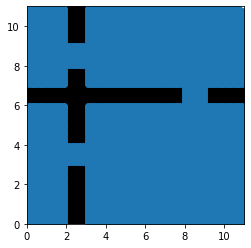

In [52]:
# vizualize validity check of motion planner
occGrid = occGrids[0,:].reshape(gridSize,gridSize)

xv, yv = np.meshgrid(np.linspace(0.01, 0.99, 80), np.linspace(0.01, 0.99, 80), indexing='xy')
xv = xv.reshape(-1)
yv = yv.reshape(-1)

x = np.zeros(shape=xv.shape)
y = np.zeros(shape=yv.shape)
for i in range(xv.shape[0] - 1):
    u = int(np.floor(xv[i] * (occGrid.shape[1]))) # right pointing image axis
    v = int(np.floor((occGrid.shape[0]) * (1 - yv[i]))) # down pointing image axis
    if occGrid[v,u] > 0:
        x[i] = xv[i]
        y[i] = yv[i]


fig, ax = plt.subplots()
ax.imshow(occGrid, extent=[0, 11, 0, 11], cmap='gray')
plt.show()

fig, ax = plt.subplots()
ax.scatter(x * (gridSize ), y * (gridSize ))
ax.axis('equal')
plt.show()

fig, ax = plt.subplots()
ax.imshow(occGrid, extent=[0, 11, 0, 11], cmap='gray')
ax.scatter(x * (gridSize ), y * (gridSize ))
plt.show()